In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, RandomFlip
from keras.callbacks import EarlyStopping

In [16]:
train_ds = keras.utils.image_dataset_from_directory(
        directory = "C:\\Users\\91909\\Desktop\\LOOP Mentorship\\Cat_Dog\\train",
        labels = "inferred",
        label_mode = "int",
        batch_size = 32,
        image_size = (150, 150)
)

validation_ds = keras.utils.image_dataset_from_directory(
        directory = "C:\\Users\\91909\\Desktop\\LOOP Mentorship\\Cat_Dog\\test",
        labels = "inferred",
        label_mode = "int",
        batch_size = 32,
        image_size = (150, 150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [17]:
def normalize(image, label):
        image = tf.cast(image/255.0, tf.float32)
        return image, label

train_ds = train_ds.map(normalize)
validation_ds = validation_ds.map(normalize)

In [18]:
model = Sequential()

model.add(RandomFlip(mode="horizontal"))

model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu",
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding="valid"))

# model.add(Conv2D(256, kernel_size=(3, 3),
#                  padding="valid",
#                  activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),
#                        strides=2,
#                        padding="valid"))
#
# model.add(Conv2D(512, kernel_size=(3, 3),
#                  padding="valid",
#                  activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2),
#                        strides=2,
#                        padding="valid"))

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [19]:
input_shape = (None, 150, 150, 3)

In [20]:
model.build(input_shape=input_shape)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 batch_normalization_8 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                      

In [22]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [23]:
early_stopping = EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        patience=5,
        restore_best_weights=True
)

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10


625/625 [==============================] - 60s 92ms/step - loss: 1.1063 - accuracy: 0.5230 - val_loss: 0.6645 - val_accuracy: 0.5538
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.7051 - accuracy: 0.5735 - val_loss: 0.6246 - val_accuracy: 0.6644
Epoch 3/10
625/625 [==============================] - 59s 94ms/step - loss: 0.6846 - accuracy: 0.6200 - val_loss: 0.6059 - val_accuracy: 0.6878
Epoch 4/10
625/625 [==============================] - 59s 93ms/step - loss: 0.6430 - accuracy: 0.6526 - val_loss: 0.5771 - val_accuracy: 0.7322
Epoch 5/10
625/625 [==============================] - 59s 95ms/step - loss: 0.6193 - accuracy: 0.6830 - val_loss: 0.5442 - val_accuracy: 0.7392
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.5842 - accuracy: 0.7370 - val_loss: 0.5381 - val_accuracy: 0.7588
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.5448 - accuracy: 0.7623 - val_loss: 0.5234 - val_accuracy: 0.7850
Epo

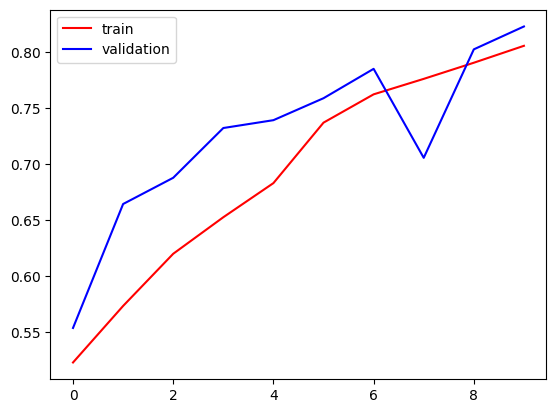

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.legend()
plt.show()

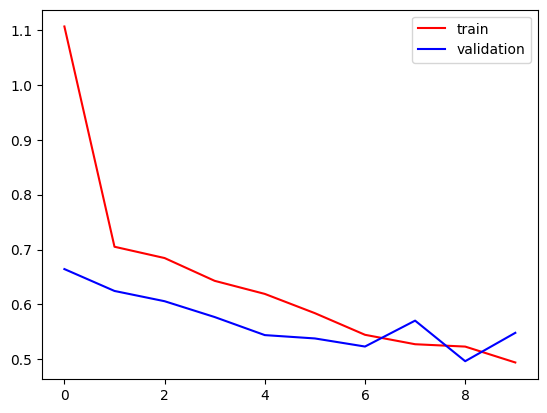

In [28]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.legend()
plt.show()

In [29]:
import cv2

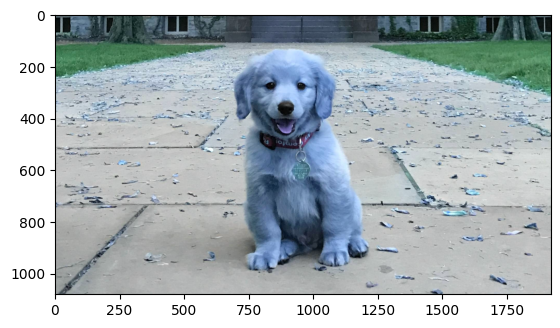

In [40]:
test_image_dog = cv2.imread("dog.jpg")
plt.imshow(test_image_dog)

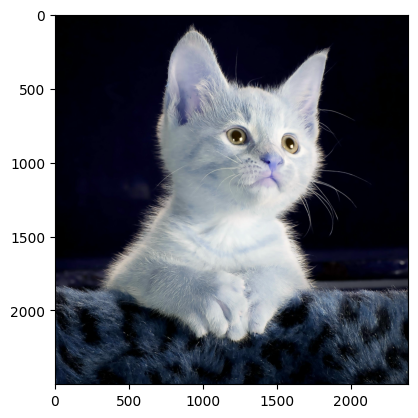

In [41]:
test_image_cat = cv2.imread("cat.jpg")
plt.imshow(test_image_cat)

In [42]:
test_image_dog = cv2.resize(test_image_dog, (150, 150))
test_image_cat = cv2.resize(test_image_cat, (150, 150))

# test_image_dog = tf.cast(test_image_dog/255.0, tf.float32)
# test_image_cat = tf.cast(test_image_cat/255.0, tf.float32)

In [47]:
test_input_cat = test_image_cat.reshape((1, 150, 150,3))
test_input_dog = test_image_dog.reshape((1, 150, 150,3))

### 1 stands for 'cat'
### 0 stands for 'dog'

In [48]:
model.predict(test_input_cat)

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)

In [49]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 35ms/step


array([[0.]], dtype=float32)